###Chronic Kidney Disease (yes or no)

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [98]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/kidney.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [99]:
df2 = df.copy()
df2.shape

(400, 26)

In [100]:
df2.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [101]:
df2.fillna(0, inplace=True)

In [102]:
df2.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [103]:
df2["classification"].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [104]:
df2["classification"].replace(["ckd\t"], "ckd", inplace=True)
df2["classification"].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

In [105]:
df2.head(50)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,0,normal,notpresent,notpresent,121.0,36.0,1.2,0.0,0.0,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,0,normal,notpresent,notpresent,0.0,18.0,0.8,0.0,0.0,11.3,38,6000,0,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,0.0,0.0,9.6,31,7500,0,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,0.0,0.0,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,0,0,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,0,normal,notpresent,notpresent,100.0,54.0,24.0,104.0,4.0,12.4,36,0,0,no,no,no,good,no,no,ckd
7,7,24.0,0.0,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.1,0.0,0.0,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.9,0.0,0.0,10.8,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [108]:
df2["dm"].unique()

array(['yes', 'no', nan], dtype=object)

In [107]:
df2["dm"] = df2["dm"].str.replace("\tno", "no").str.replace("\tyes", "yes").str.replace(" yes", "yes")

In [109]:
df2["cad"].unique()

array(['no', 'yes', '\tno', 0], dtype=object)

In [110]:
df2["cad"] = df2["cad"].str.replace("\tno", "no")
df2["cad"].unique()

array(['no', 'yes', nan], dtype=object)

In [111]:
df2_encoded = pd.get_dummies(df2, columns=["rbc",	"pc",	"pcc", "ba", "htn",	"dm", "cad",
                                 	"appet", "pe", "ane"], drop_first=True)
df2_encoded.head(50)

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,classification,rbc_abnormal,rbc_normal,pc_abnormal,pc_normal,pcc_notpresent,pcc_present,ba_notpresent,ba_present,htn_no,htn_yes,dm_yes,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,0.0,0.0,15.4,44,7800,5.2,ckd,0,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0
1,1,7.0,50.0,1.020,4.0,0.0,0.0,18.0,0.8,0.0,0.0,11.3,38,6000,0,ckd,0,0,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,0.0,0.0,9.6,31,7500,0,ckd,0,1,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,ckd,0,1,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,0.0,0.0,11.6,35,7300,4.6,ckd,0,1,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0
5,5,60.0,90.0,1.015,3.0,0.0,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,ckd,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0
6,6,68.0,70.0,1.010,0.0,0.0,100.0,54.0,24.0,104.0,4.0,12.4,36,0,0,ckd,0,0,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0
7,7,24.0,0.0,1.015,2.0,4.0,410.0,31.0,1.1,0.0,0.0,12.4,44,6900,5,ckd,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0
8,8,52.0,100.0,1.015,3.0,0.0,138.0,60.0,1.9,0.0,0.0,10.8,33,9600,4.0,ckd,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1
9,9,53.0,90.0,1.020,2.0,0.0,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,ckd,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1


In [112]:
df2_encoded.shape

(400, 34)

In [113]:
df2_encoded.drop(["id", "age"], axis=1, inplace=True)

In [145]:
df2_encoded.head(50)

,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,classification,rbc_abnormal,rbc_normal,pc_abnormal,pc_normal,pcc_notpresent,pcc_present,ba_notpresent,ba_present,htn_no,htn_yes,dm_yes,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,0.0,0.0,15.4,44,7800,5.2,ckd,0,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0
1,50.0,1.020,4.0,0.0,0.0,18.0,0.8,0.0,0.0,11.3,38,6000,0,ckd,0,0,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0
2,80.0,1.010,2.0,3.0,423.0,53.0,1.8,0.0,0.0,9.6,31,7500,0,ckd,0,1,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1
3,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,ckd,0,1,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1
4,80.0,1.010,2.0,0.0,106.0,26.0,1.4,0.0,0.0,11.6,35,7300,4.6,ckd,0,1,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0
5,90.0,1.015,3.0,0.0,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,ckd,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0
6,70.0,1.010,0.0,0.0,100.0,54.0,24.0,104.0,4.0,12.4,36,0,0,ckd,0,0,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0
7,0.0,1.015,2.0,4.0,410.0,31.0,1.1,0.0,0.0,12.4,44,6900,5,ckd,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0
8,100.0,1.015,3.0,0.0,138.0,60.0,1.9,0.0,0.0,10.8,33,9600,4.0,ckd,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1
9,90.0,1.020,2.0,0.0,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,ckd,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1


In [121]:
df2["classification"] = df2["classification"].str.replace("ckd", "1").str.replace("not1", "0")
df2["classification"].value_counts()

1    250
0    150
Name: classification, dtype: int64

In [137]:
df2_encoded.dtypes

bp                float64
sg                float64
al                float64
su                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
classification     object
rbc_abnormal        uint8
rbc_normal          uint8
pc_abnormal         uint8
pc_normal           uint8
pcc_notpresent      uint8
pcc_present         uint8
ba_notpresent       uint8
ba_present          uint8
htn_no              uint8
htn_yes             uint8
dm_yes              uint8
cad_yes             uint8
appet_good          uint8
appet_poor          uint8
pe_no               uint8
pe_yes              uint8
ane_no              uint8
ane_yes             uint8
dtype: object

In [156]:
cols = df2_encoded.select_dtypes(exclude=['float']).columns
df2_encoded[cols] = df2_encoded[cols].apply(pd.to_numeric, downcast='float', errors='coerce')
df2_encoded.dtypes

bp                float64
sg                float64
al                float64
su                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float32
wc                float32
rc                float32
classification    float32
rbc_abnormal        uint8
rbc_normal          uint8
pc_abnormal         uint8
pc_normal           uint8
pcc_notpresent      uint8
pcc_present         uint8
ba_notpresent       uint8
ba_present          uint8
htn_no              uint8
htn_yes             uint8
dm_yes              uint8
cad_yes             uint8
appet_good          uint8
appet_poor          uint8
pe_no               uint8
pe_yes              uint8
ane_no              uint8
ane_yes             uint8
dtype: object

In [162]:
X = df2_encoded.drop(["classification"], axis=1)
y = df2["classification"].astype("int")

In [173]:
X.fillna(0, inplace=True)
X.isnull().sum()

bp                0
sg                0
al                0
su                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
rbc_abnormal      0
rbc_normal        0
pc_abnormal       0
pc_normal         0
pcc_notpresent    0
pcc_present       0
ba_notpresent     0
ba_present        0
htn_no            0
htn_yes           0
dm_yes            0
cad_yes           0
appet_good        0
appet_poor        0
pe_no             0
pe_yes            0
ane_no            0
ane_yes           0
dtype: int64

In [174]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=45)

In [175]:
# Create a decision tree
dt = DecisionTreeClassifier(random_state=45)
dt = dt.fit(X_train, y_train)

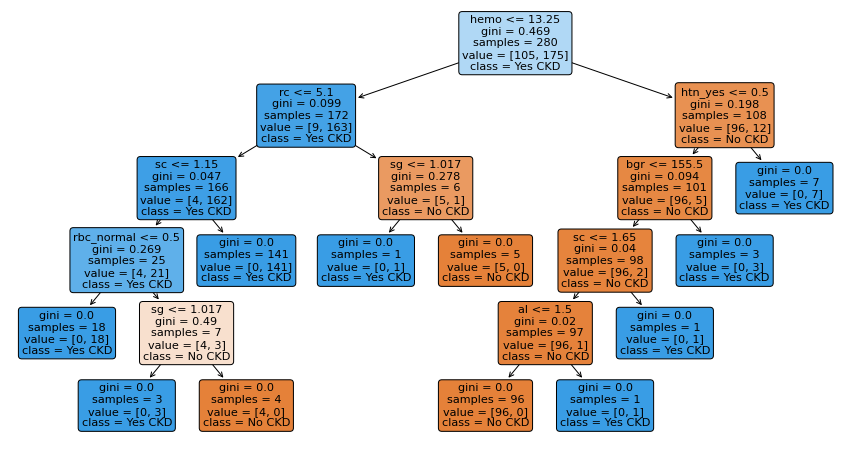

In [180]:
# Plot the tree
plt.figure(figsize=(15, 8))
plot_tree(dt,
          filled=True,
          rounded=True,
          class_names=["No CKD", "Yes CKD"],
          feature_names=X.columns);

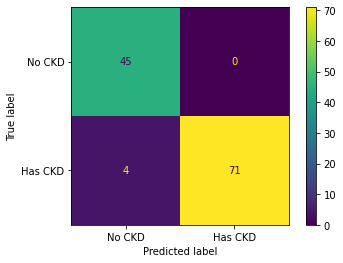

In [182]:
# Plot a confusion matrix
plot_confusion_matrix(dt, X_test, y_test, display_labels=["No CKD", "Has CKD"]);

In [183]:
dt.score(X_test, y_test)

0.9666666666666667

In [189]:
# Cost Complexity Pruning
path = dt.cost_complexity_pruning_path(X_train, y_train) # Determine values for alpha
ccp_alphas = path.ccp_alphas # Extract different values for alpha
ccp_alphas = ccp_alphas[:-1] # Exclude the maximum value for alpha

dts = []
for ccp_alpha in ccp_alphas:
  dt = DecisionTreeClassifier(random_state=45, ccp_alpha=ccp_alpha)
  dt.fit(X_train, y_train)
  dts.append(dt)

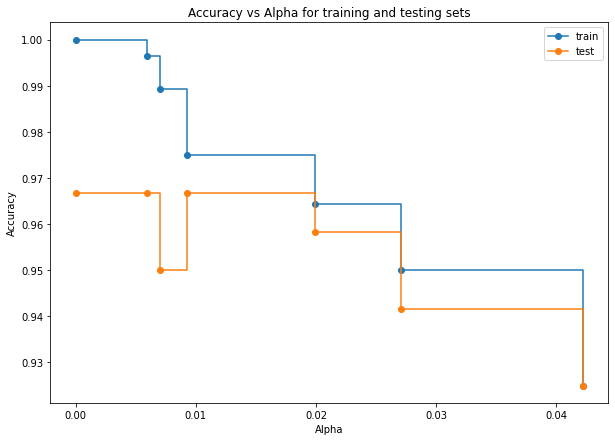

In [190]:
train_scores = [dt.score(X_train, y_train) for dt in dts]
test_scores = [dt.score(X_test, y_test) for dt in dts]

fig, ax = plt.subplots(figsize=(10, 7))
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show();

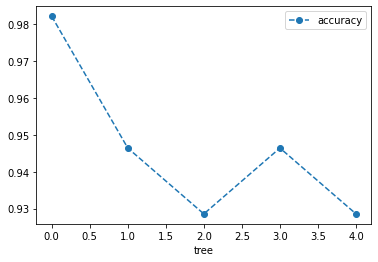

In [194]:
# Cross Validation for finding the best Alpha
from sklearn.model_selection import cross_val_score
dt = DecisionTreeClassifier(random_state=45, ccp_alpha=0.012)
scores = cross_val_score(dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={"tree": range(5), "accuracy": scores})

df.plot(x="tree", y="accuracy", marker="o", linestyle="--");

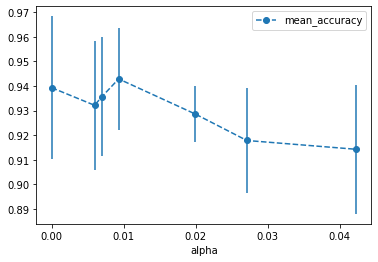

In [198]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
  dt = DecisionTreeClassifier(random_state=45, ccp_alpha=ccp_alpha)
  scores = cross_val_score(dt, X_train, y_train, cv=5)
  alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values,
                               columns=["alpha", "mean_accuracy", "std"])
  
alpha_results.plot(x="alpha",
                     y="mean_accuracy",
                     yerr="std",
                     marker="o",
                     linestyle="--");

In [200]:
alpha_results[(alpha_results["alpha"] > 0.008)
              &
              (alpha_results["alpha"] < 0.012)]

,alpha,mean_accuracy,std
3,0.009294,0.942857,0.020825


In [202]:
ideal_ccp_alpha = alpha_results[(alpha_results["alpha"] > 0.008)
                                &
                                (alpha_results["alpha"] < 0.012)]["alpha"]
ideal_ccp_alpha

3    0.009294
Name: alpha, dtype: float64

In [204]:
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.009294320137693622

In [207]:
dt_pruned = DecisionTreeClassifier(random_state=45,
                                   ccp_alpha=ideal_ccp_alpha)
dt_pruned = dt_pruned.fit(X_train, y_train)

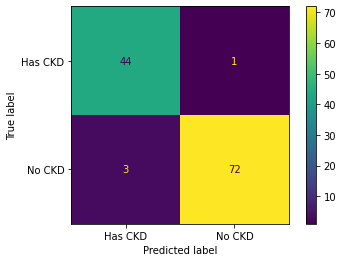

In [208]:
plot_confusion_matrix(dt_pruned,
                      X_test,
                      y_test,
                      display_labels=["Has CKD", "No CKD"]);

In [209]:
dt_pruned.score(X_test, y_test)

0.9666666666666667

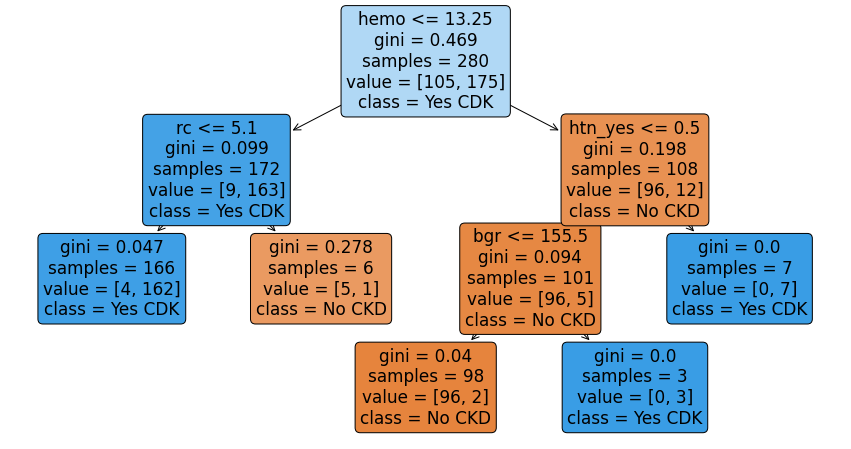

In [211]:
# The final tree
plt.figure(figsize=(15, 8))
plot_tree(dt_pruned,
          filled=True,
          rounded=True,
          class_names=["No CKD", "Yes CDK"],
          feature_names=X.columns);